<a href="https://colab.research.google.com/github/Jessvcv/Statistical-Modeling-HW/blob/main/Tran_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=db43097483c319d4fe749df84c2ee36c2bbc330c5b4806becf8bd9f8eb9e0acf
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)

In [ ]:
weekly_df = load_data("Weekly")
weekly_df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

# Q1. (1 point)
Use Linear Discriminant Analysis to fit a model which uses `Lag2` to predict `Direction`. Print the summary.

In [ ]:
# Import LDA from scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define predictor and response
X_lag2 = weekly_df[['Lag2']]
y = weekly_df['Direction']

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_lag2, y)

# Print the class means and coefficients
print("Class means for Lag2:")
print(lda.means_)

print("\nCoefficients of linear discriminants:")
print(lda.coef_)

print("\nIntercept:")
print(lda.intercept_)


Class means for Lag2:
[[-0.04042355]
 [ 0.30428099]]

Coefficients of linear discriminants:
[[0.06230689]]

Intercept:
[0.21492348]


# Q2. (1 point)
Create a confusion matrix. What types of mistakes are being made?

In [ ]:
from sklearn.metrics import confusion_matrix

# Predicted classes using LDA
pred_class_lda = lda.predict(X_lag2)

# Confusion matrix
conf_mat_lda = confusion_matrix(y, pred_class_lda, labels=['Down','Up'])
print("Confusion Matrix:")
print(conf_mat_lda)

Confusion Matrix:
[[ 33 451]
 [ 25 580]]


The most common mistakes is false positives for the Up class.

# Q3. (1 point)
Split the pima_df into testing and training and build a model using the training set to predict “Outcome” being 1 given the other features. Summarize the model coefficients.


In [ ]:
pima_url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'

In [ ]:
pima_df = pd.read_csv(pima_url)

In [ ]:
# Define predictors and response
X = pima_df.drop('Outcome', axis=1)
y = pima_df['Outcome']

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

# Add intercept term
X_train_const = sm.add_constant(X_train)

# Fit logistic regression
logit_model = sm.Logit(y_train, X_train_const).fit()

# Print model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.487595
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Oct 2025   Pseudo R-squ.:                  0.2456
Time:                        02:07:49   Log-Likelihood:                -261.84
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.015e-32
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.5575      0.822     -9.196      0.000      -9.168

# Q4. (1 point)
Using a 50% threshold, assign values with probability >= 0.5 a value of 1 and those lower to 0. Print the accuracy score and confusion matrix (confusion table) for these results.

In [ ]:
# Add intercept to test predictors
X_test_const = sm.add_constant(X_test)

# Predict probabilities of Outcome = 1
y_prob = logit_model.predict(X_test_const)

# Assign 1 if probability >= 0.5, else 0
y_pred = (y_prob >= 0.5).astype(int)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Confusion Matrix
conf_matrix = confusion_table(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.814
Confusion Matrix:
Truth        0   1
Predicted         
0          138  12
1           31  50


# Q5. (1 point)
Now we will try different thresholds by using sklearn’s roc_curve function. Create an ROC curve for this model.

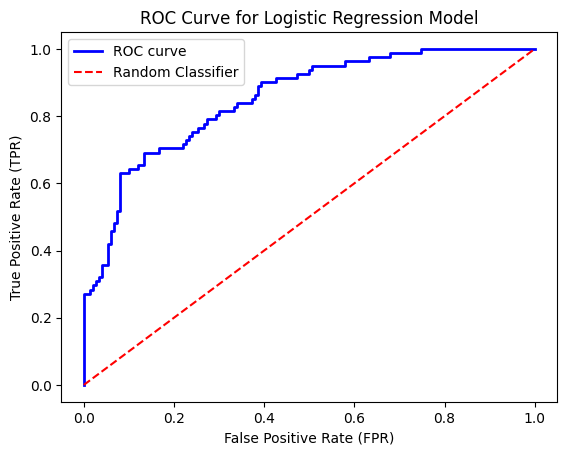

In [ ]:
# Predicted probabilities of Outcome = 1
y_prob = logit_model.predict(X_test_const)

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()


# Q6. (2 points)
Now create a new model which uses only “BMI”, “BloodPressure”, and “Insulin” to predict “Outcome”. Create another ROC curve for this model. What are the AUC values for this model and the last model? Which is better?

Optimization terminated successfully.
         Current function value: 0.604727
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      533
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Oct 2025   Pseudo R-squ.:                 0.06439
Time:                        02:07:51   Log-Likelihood:                -324.74
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.073e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3701      0.563     -5.989      0.000      -4.473      -2.267
BMI               0.

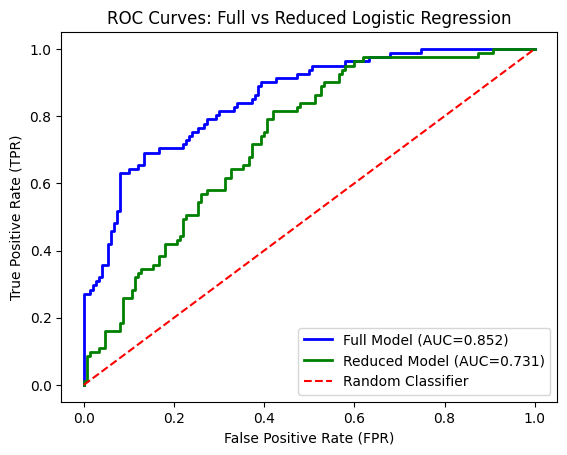

In [ ]:
# Predictor set
X_reduced = pima_df[['BMI', 'BloodPressure', 'Insulin']]
y = pima_df['Outcome']

# Split into training and testing sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y)

# Add intercept
X_train_r_const = sm.add_constant(X_train_r)

# Fit logistic regression
logit_model_r = sm.Logit(y_train_r, X_train_r_const).fit()

# Print summary of coefficients
print(logit_model_r.summary())

# Add intercept to test set
X_test_r_const = sm.add_constant(X_test_r)

# Predicted probabilities
y_prob_r = logit_model_r.predict(X_test_r_const)

# Full model ROC (from previous)
y_prob_full = logit_model.predict(sm.add_constant(X_test))
fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
auc_full = roc_auc_score(y_test, y_prob_full)

# Reduced model ROC
fpr_r, tpr_r, _ = roc_curve(y_test_r, y_prob_r)
auc_r = roc_auc_score(y_test_r, y_prob_r)

# Plot both ROC curves
plt.plot(fpr_full, tpr_full, label=f'Full Model (AUC={auc_full:.3f})', color='blue', lw=2)
plt.plot(fpr_r, tpr_r, label=f'Reduced Model (AUC={auc_r:.3f})', color='green', lw=2)
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves: Full vs Reduced Logistic Regression')
plt.legend()

print(f"Full model AUC: {auc_full:.3f}")
print(f"Reduced model AUC: {auc_r:.3f}")

if auc_full > auc_r:
    print("The full model performs better.")
elif auc_full < auc_r:
    print("The reduced model performs better.")
else:
    print("Both models have similar performance.")

